In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models



2025-06-26 21:35:55.967313: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-26 21:35:55.979781: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-26 21:35:56.077814: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-26 21:35:56.165780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750950356.251728    3536 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750950356.27

In [4]:
data_train_path = '/home/yhs/Documents/AI_RIG/AI Project/Fruits_Vegetables/train'
data_test_path = '/home/yhs/Documents/AI_RIG/AI Project/Fruits_Vegetables/test'
data_val_path = '/home/yhs/Documents/AI_RIG/AI Project/Fruits_Vegetables/validation'

img_width = 192
img_height = 192

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)


Found 3115 files belonging to 36 classes.


2025-06-26 21:35:58.658286: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
data_cat = data_train.class_names

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


2025-06-26 21:35:58.999589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: known incorrect sRGB profile
2025-06-26 21:35:59.150148: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


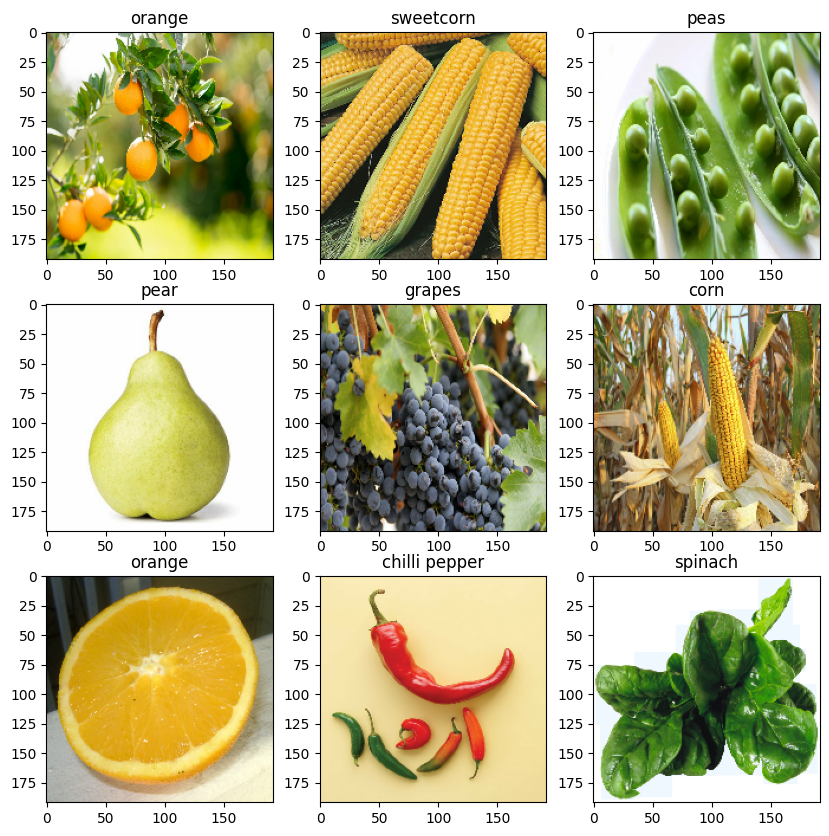

In [9]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])

In [10]:
from keras.models import Sequential

data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 192, 192, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),#Purpose: Normalize pixel values from [0, 255] → [0, 1]. Neural networks learn faster and better when inputs are normalized.
    layers.Conv2D(16,3, padding='same',activation='relu'),#convolution make image to 
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(data_cat),activation='softmax')
])

In [ ]:
# optimizer_t = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
epochs_size = 13
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Text(0.5, 1.0, 'Loss')

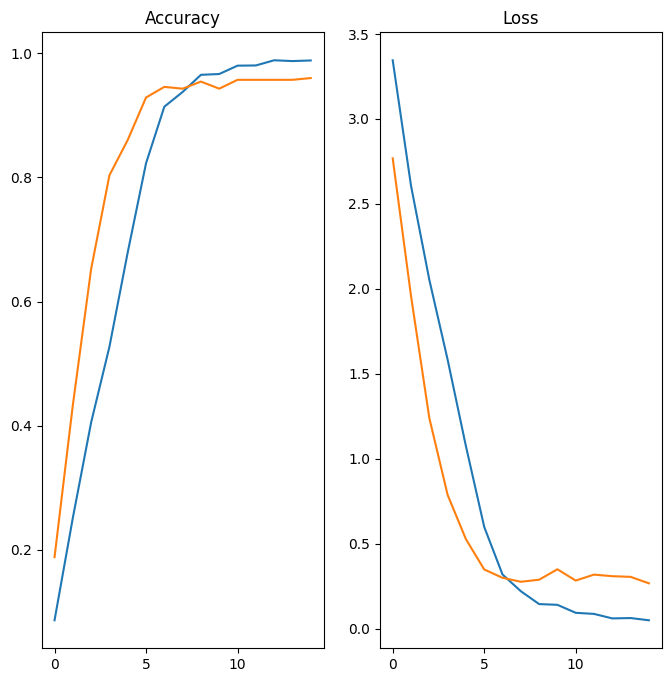

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [14]:
image = 'banana.jpg'
image = keras.utils.load_img(image, target_size=(img_width, img_height))
img_arr = keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

print('Veg/Fruit in image is {} with accurancy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Veg/Fruit in image is jalepeno with accurancy of 4.62
